# Make histogramms for any quantities

- author Sylvie Dagoret-Campagne
- creation date October 18th 2018
- update December 2022

In [1]:
# Set up matplotlib and use a nicer set of plot parameters
%config InlineBackend.rc = {}
import matplotlib
import matplotlib as mpl
matplotlib.rc_file("templates/matplotlibrc")
import matplotlib.pyplot as plt
import matplotlib.mlab as mlab
%matplotlib inline


Bad key axes.color_cycle in file templates/matplotlibrc, line 215 ('axes.color_cycle    : 348ABD, 7A68A6, A60628, 467821, CF4457, 188487, E24A33')
You probably need to get an updated matplotlibrc file from
https://github.com/matplotlib/matplotlib/blob/v3.5.2/matplotlibrc.template
or from the matplotlib source distribution

Bad key keymap.all_axes in file templates/matplotlibrc, line 393 ('keymap.all_axes : a                 # enable all axes')
You probably need to get an updated matplotlibrc file from
https://github.com/matplotlib/matplotlib/blob/v3.5.2/matplotlibrc.template
or from the matplotlib source distribution


In [2]:
import os
import re
import numpy as np
#from mpl_toolkits.basemap import Basemap
from matplotlib import colors
from matplotlib.backends.backend_pdf import PdfPages
import pandas as pd

In [3]:
import datetime as dt

In [4]:
YEARSTR="2022"
YEARNUM=int(YEARSTR)

In [5]:
#VAR_name='TOTANGSTR'
#VAR_title='Angstrom Parameter'
#VAR_unit='@470-870nm'
#VAR_min=0
#VAR_max=2

In [6]:
VAR_name='TOTEXTTAU'
VAR_title='Extinction'
VAR_unit='@550nm'
VAR_min=0
VAR_max=0.5

In [7]:
obs="lsst"

In [8]:
yearfile="MERRA2_"+YEARSTR+"_tavg1_2d_aer_Nx_M2T1NXAER_" + obs + "_AllYear.csv"

In [9]:
yearfile

'MERRA2_2022_tavg1_2d_aer_Nx_M2T1NXAER_lsst_AllYear.csv'

In [10]:
df_year=pd.read_csv(yearfile)

In [11]:
df_year.head()

,time,TOTANGSTR,TOTEXTTAU,TOTSCATAU
0,2022-01-01 00:30:00,1.340653,0.038421,0.035518
1,2022-01-01 01:30:00,1.392255,0.035196,0.032427
2,2022-01-01 02:30:00,1.430206,0.032951,0.030263
3,2022-01-01 03:30:00,1.443329,0.031118,0.028494
4,2022-01-01 04:30:00,1.451432,0.029195,0.026646


## Per year

In [12]:
df_year.describe()

,TOTANGSTR,TOTEXTTAU,TOTSCATAU
count,7296.000000,7296.000000,7296.000000
mean,1.400537,0.053635,0.050607
std,0.132234,0.049720,0.048682
min,0.685860,0.008917,0.007832
25%,1.318884,0.030093,0.027456
50%,1.403018,0.041051,0.038026
75%,1.489299,0.059665,0.056177
max,1.766323,0.839349,0.804171


In [13]:
df_year.quantile([0.05,0.1,0.5,0.9,0.95])

,TOTANGSTR,TOTEXTTAU,TOTSCATAU
0.05,1.181350,0.018507,0.016875
0.10,1.233014,0.022203,0.020378
0.50,1.403018,0.041051,0.038026
0.90,1.569294,0.089384,0.085067
0.95,1.606525,0.134933,0.130102


In [14]:
var_year=df_year[VAR_name]

In [15]:
var_year.replace(to_replace=0, value=np.nan)

0       0.038421
1       0.035196
2       0.032951
3       0.031118
4       0.029195
          ...   
7291    0.037670
7292    0.036985
7293    0.036404
7294    0.035611
7295    0.035104
Name: TOTEXTTAU, Length: 7296, dtype: float64

In [16]:
mean_var_y = np.mean(var_year)
variance_var_y = np.var(var_year)
sigma_var_y = np.sqrt(variance_var_y)

In [17]:
mean_var_y=np.trunc(mean_var_y*1000)/1000
sigma_var_y=np.trunc(sigma_var_y*1000)/1000

In [18]:
title = "Yearly variation of {} (year {}), mean = {} std = {}".format(VAR_title,YEARSTR,mean_var_y ,sigma_var_y)

findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans.
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Helvetica, Bitstream Vera Sans, Lucida Grande, Verdana, Geneva, Lucid, Avant Garde, sans-serif
findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans.
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Helvetica, Bitstream Vera Sans, Lucida Grande, Verdana, Geneva, Lucid, Avant Garde, sans-serif
findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans.
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Helvetica, Bitstream Vera Sans, Lucida Grande, Verdana, Geneva, Lucid, Avant Garde, sans-serif


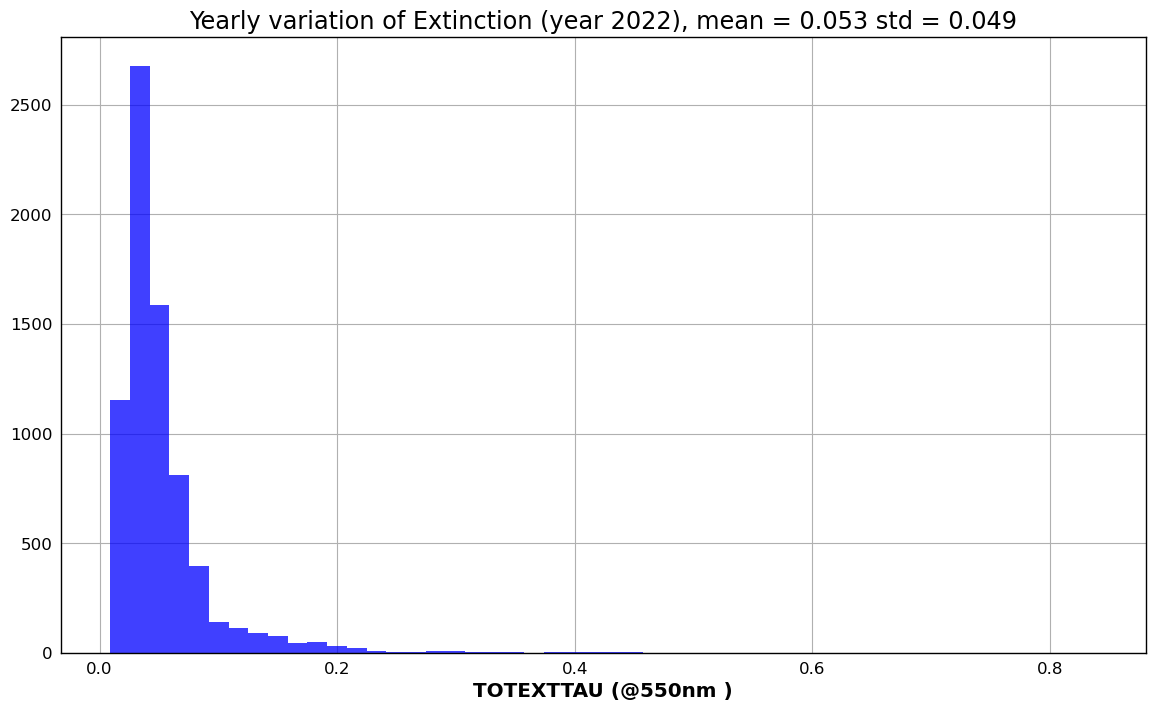

In [19]:
plt.figure(figsize=(14,8))
n, bins, patches = plt.hist(var_year, 50, density=False, facecolor='blue', alpha=0.75)
plt.title(title)
xtitle=VAR_name+' ('+VAR_unit+' )' 
plt.xlabel(xtitle)
figfilename='Histo_'+VAR_name+'_'+YEARSTR+'_allyear.png'
plt.savefig(figfilename)

# Selection of a period

In [20]:
df_year['time'].values

array(['2022-01-01 00:30:00', '2022-01-01 01:30:00',
       '2022-01-01 02:30:00', ..., '2022-10-31 21:30:00',
       '2022-10-31 22:30:00', '2022-10-31 23:30:00'], dtype=object)

In [21]:
all_datetime=pd.to_datetime(df_year['time'].values)

In [22]:
all_datetime

DatetimeIndex(['2022-01-01 00:30:00', '2022-01-01 01:30:00',
               '2022-01-01 02:30:00', '2022-01-01 03:30:00',
               '2022-01-01 04:30:00', '2022-01-01 05:30:00',
               '2022-01-01 06:30:00', '2022-01-01 07:30:00',
               '2022-01-01 08:30:00', '2022-01-01 09:30:00',
               ...
               '2022-10-31 14:30:00', '2022-10-31 15:30:00',
               '2022-10-31 16:30:00', '2022-10-31 17:30:00',
               '2022-10-31 18:30:00', '2022-10-31 19:30:00',
               '2022-10-31 20:30:00', '2022-10-31 21:30:00',
               '2022-10-31 22:30:00', '2022-10-31 23:30:00'],
              dtype='datetime64[ns]', length=7296, freq=None)

In [23]:
if obs == "lsst":
    summer_time_index=np.where(np.logical_and(all_datetime>dt.datetime(YEARNUM,1,1),all_datetime<dt.datetime(YEARNUM,3,31)))
    winter_time_index=np.where(np.logical_and(all_datetime>dt.datetime(YEARNUM,6,1),all_datetime<dt.datetime(YEARNUM,8,31)))
else:
    winter_time_index=np.where(np.logical_and(all_datetime>dt.datetime(YEARNUM,1,1),all_datetime<dt.datetime(YEARNUM,3,31)))
    summer_time_index=np.where(np.logical_and(all_datetime>dt.datetime(YEARNUM,6,1),all_datetime<dt.datetime(YEARNUM,8,31)))
    

In [24]:
var_winter=var_year.values[winter_time_index]
var_summer=var_year.values[summer_time_index]

In [25]:
mean_var_winter = np.mean(var_winter)
variance_var_winter = np.var(var_winter)
sigma_var_winter = np.std(var_winter)

In [26]:
mean_var_summer = np.mean(var_summer)
variance_var_summer = np.var(var_summer)
sigma_var_summer = np.std(var_summer)

In [27]:
mw=np.trunc(mean_var_winter*100)/100
sw=np.trunc(sigma_var_winter*100)/100

ms=np.trunc(mean_var_summer*100)/100
ss=np.trunc(sigma_var_summer*100)/100

In [28]:
title = "Yearly variation of {}({}) (year {}), summer : {} +/- {}, winter : {} +/- {}".format(VAR_title,VAR_unit,YEARSTR,ms,ss,mw,sw)

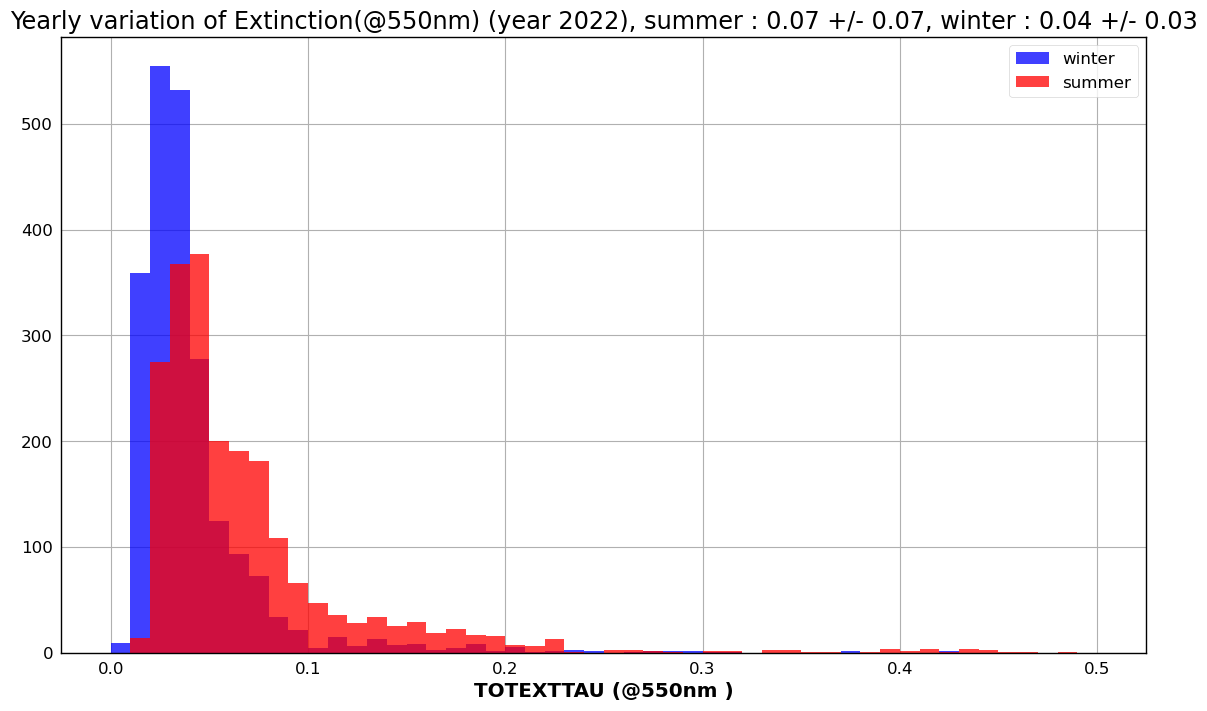

In [29]:
plt.figure(figsize=(14,8))
n, bins, patches = plt.hist(var_winter, 50, range=(VAR_min,VAR_max),density=False, facecolor='blue', alpha=0.75,label='winter')
n, bins, patches = plt.hist(var_summer, 50, range=(VAR_min,VAR_max),density=False, facecolor='red', alpha=0.75,label='summer')
plt.title(title)
xtitle=VAR_name+' ('+VAR_unit+' )' 
plt.xlabel(xtitle)
figfilename='Histo_'+VAR_name+'_'+YEARSTR+'_WinterSummer.png'
plt.legend()
plt.savefig(figfilename)